In [1]:
import pandas as pd
df=pd.read_csv("DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [2]:
df.shape

(10127, 20)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [4]:
from tabulate import tabulate
list_1=df.select_dtypes(include='object')
list_2=df.select_dtypes(exclude='object')
print(tabulate({"Categorical":list_1,
                "continuous": list_2}, headers = ["categorical", "continuous"]))

categorical      continuous
---------------  ------------------------
Attrition_Flag   CLIENTNUM
Gender           Customer_Age
Education_Level  Dependent_count
Marital_Status   Months_on_book
Income_Category  Total_Relationship_Count
Card_Category    Months_Inactive_12_mon
Region           Contacts_Count_12_mon
                 Credit_Limit
                 Total_Revolving_Bal
                 Avg_Open_To_Buy
                 Total_Trans_Amt
                 Total_Trans_Ct
                 Avg_Utilization_Ratio


# Data pre-Processing using python
# Identify the missing values in the dataset and display the count of missing values


In [5]:
#checking missing value
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

# There are two columns which have missing values card category and credit limit

# Perform data imputation, using which ever method suits most logically for the given columns in the dataset


In [6]:
#null value treatment for the categorical column by filling it with most frequent one
df.Card_Category.value_counts()

Blue        9315
Silver       544
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [7]:
df.Card_Category=df.Card_Category.fillna("Blue")

In [8]:
#in numerical column the the null value filled with the mean value
df.Credit_Limit=df.Credit_Limit.fillna(df.Credit_Limit.mean())

In [9]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
df.to_csv("Bank churn preprocessed data.csv")

# Skewness

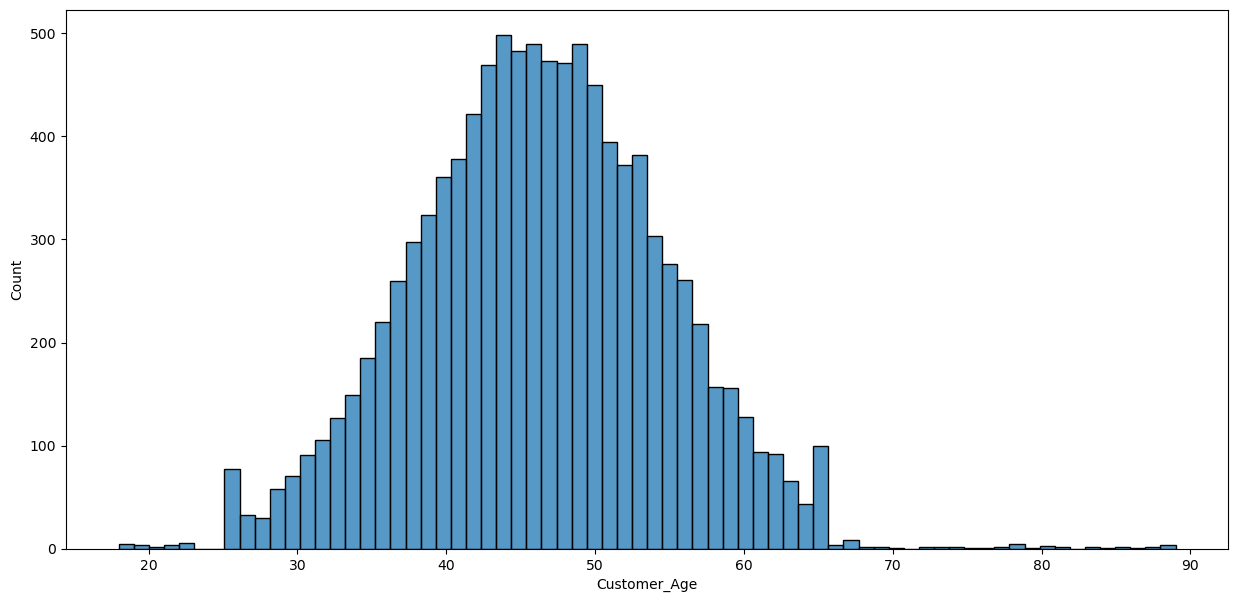

In [28]:
 import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize = (15, 7))
sns.histplot(x = df["Customer_Age"])

plt.show()


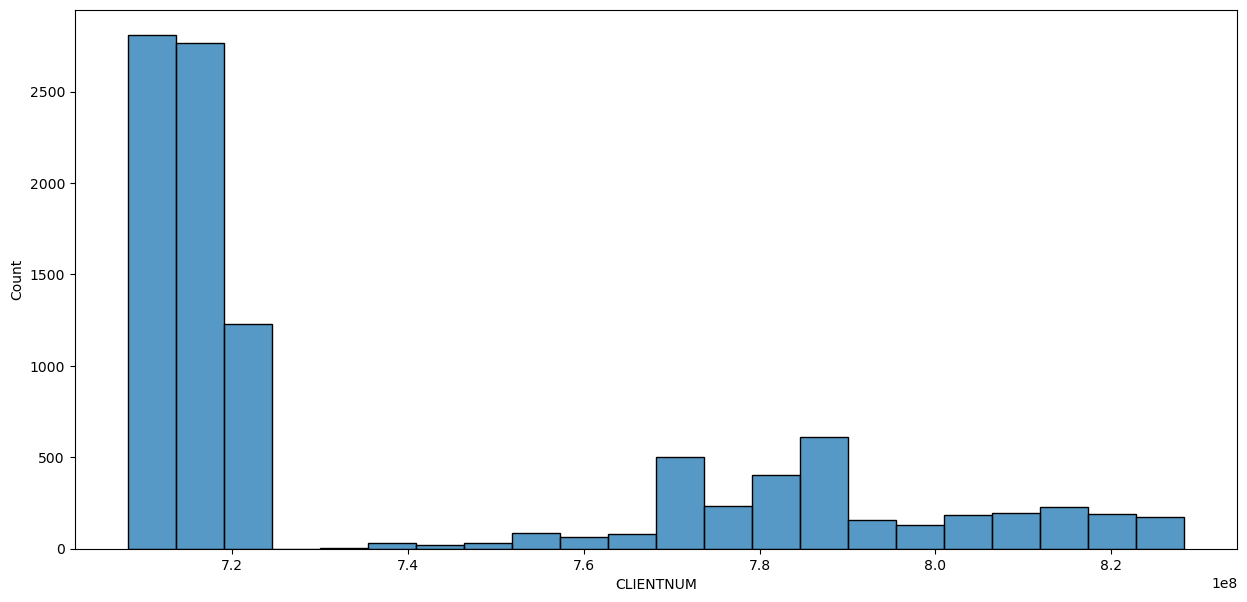

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize = (15, 7))
sns.histplot(x = df["CLIENTNUM"])


plt.show()

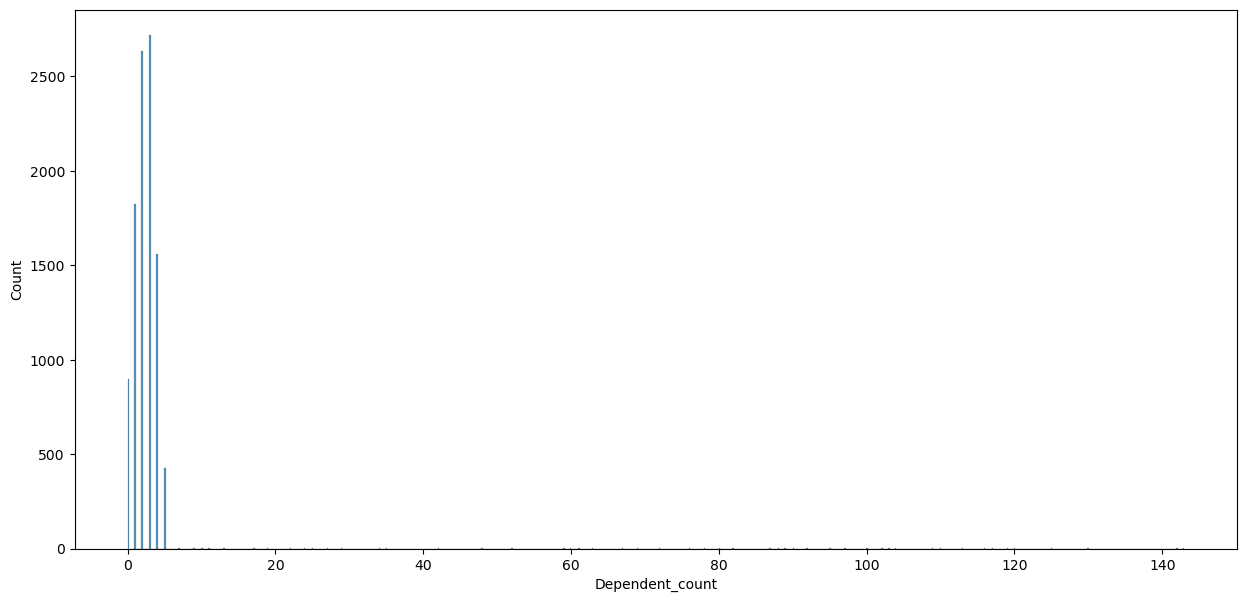

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize = (15, 7))
sns.histplot(x = df["Dependent_count"])


plt.show()

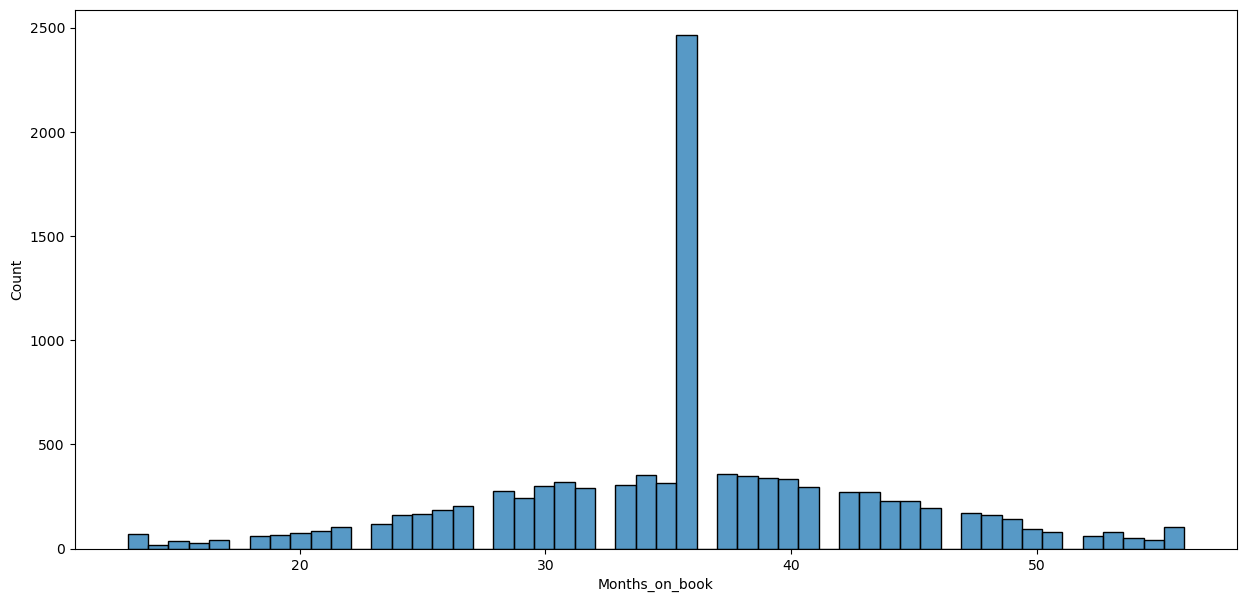

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,figsize = (15, 7))

sns.histplot(x = df["Months_on_book"])

plt.show()

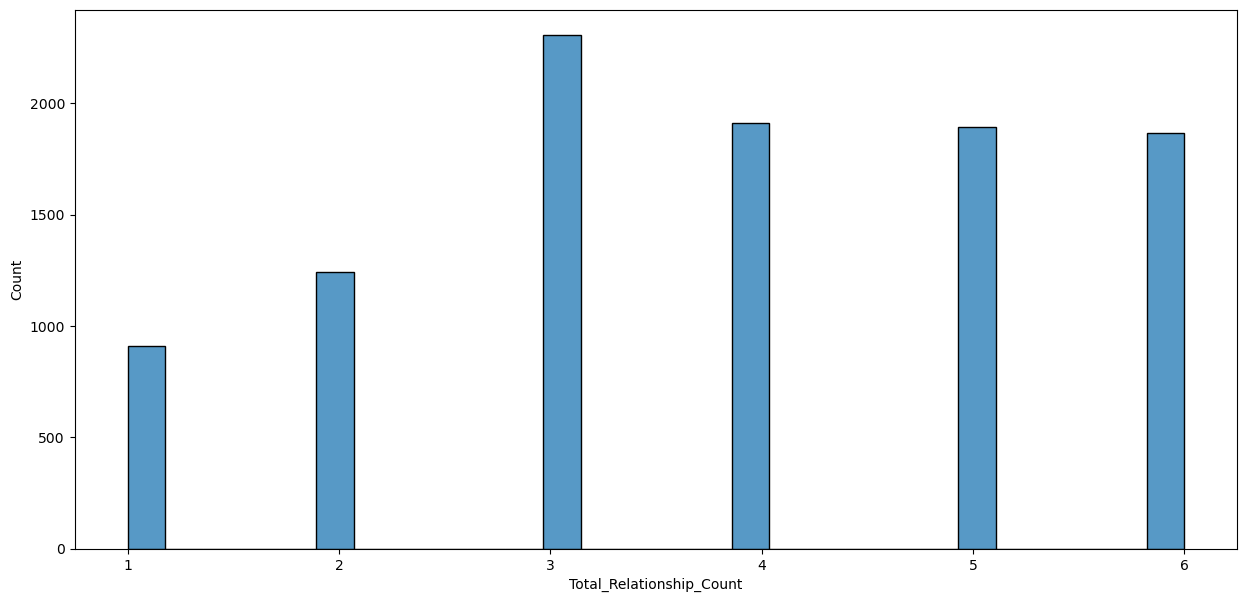

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,figsize = (15, 7))

sns.histplot(x = df["Total_Relationship_Count"])


plt.show()

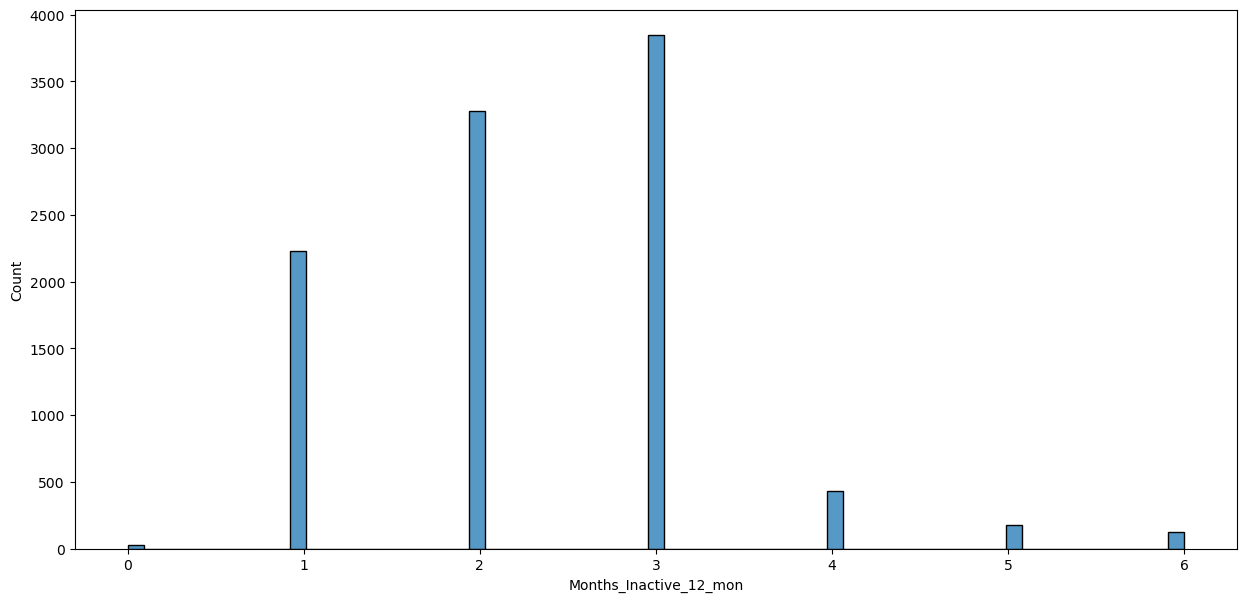

In [16]:
fig, ax = plt.subplots(1, figsize = (15, 7))

sns.histplot(x = df["Months_Inactive_12_mon"])


plt.show()

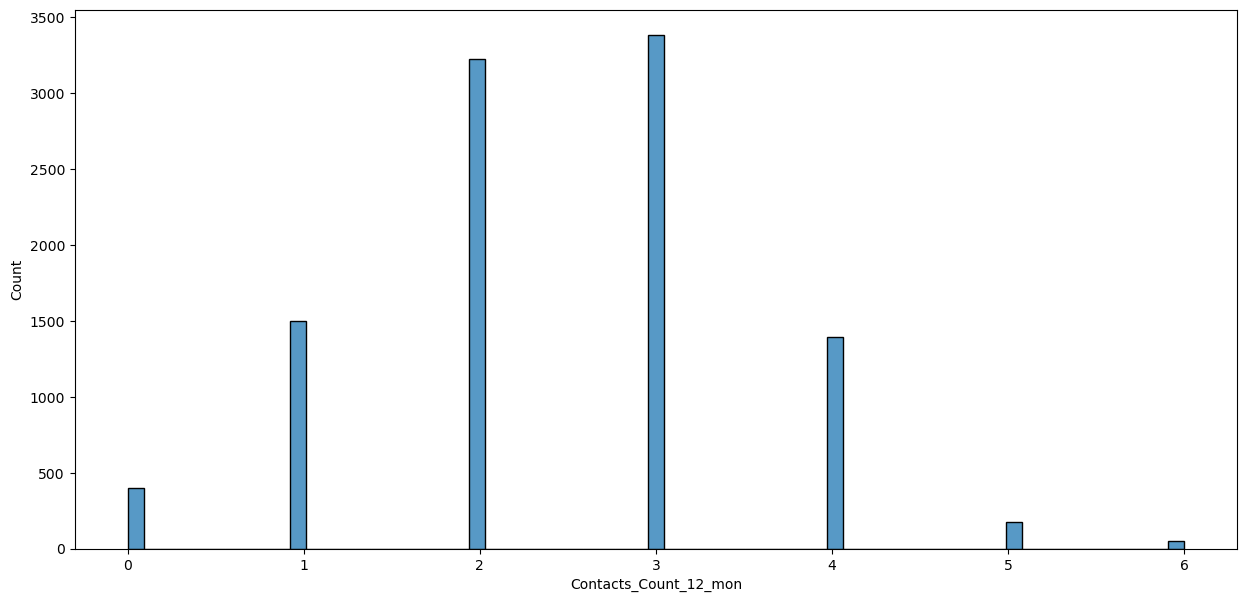

In [17]:
fig, ax = plt.subplots(1, figsize = (15, 7))

sns.histplot(x = df["Contacts_Count_12_mon"])


plt.show()

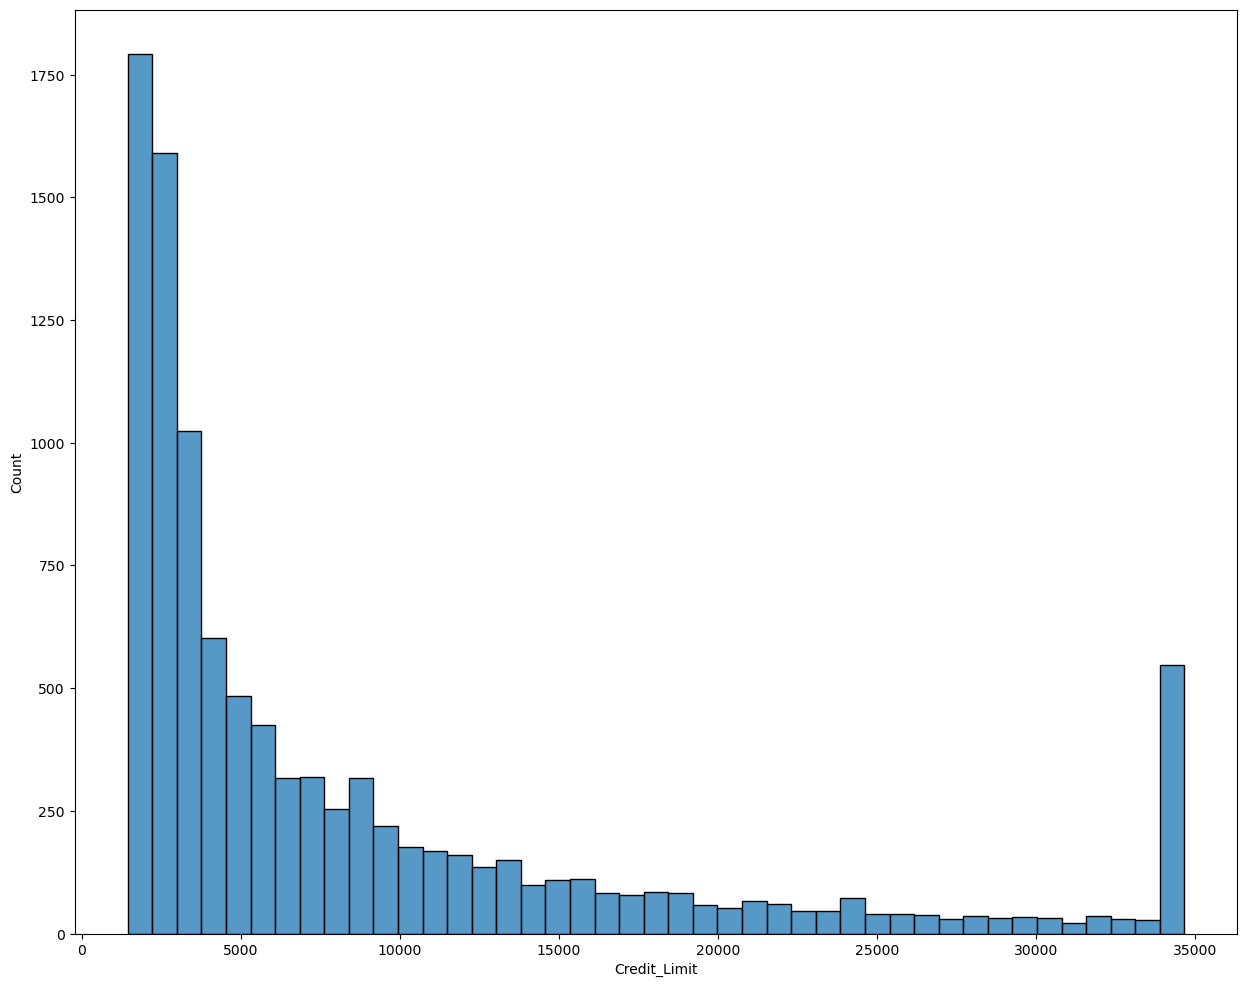

In [18]:
fig, ax = plt.subplots(1,figsize = (15, 12))

sns.histplot(x = df["Credit_Limit"])


plt.show()

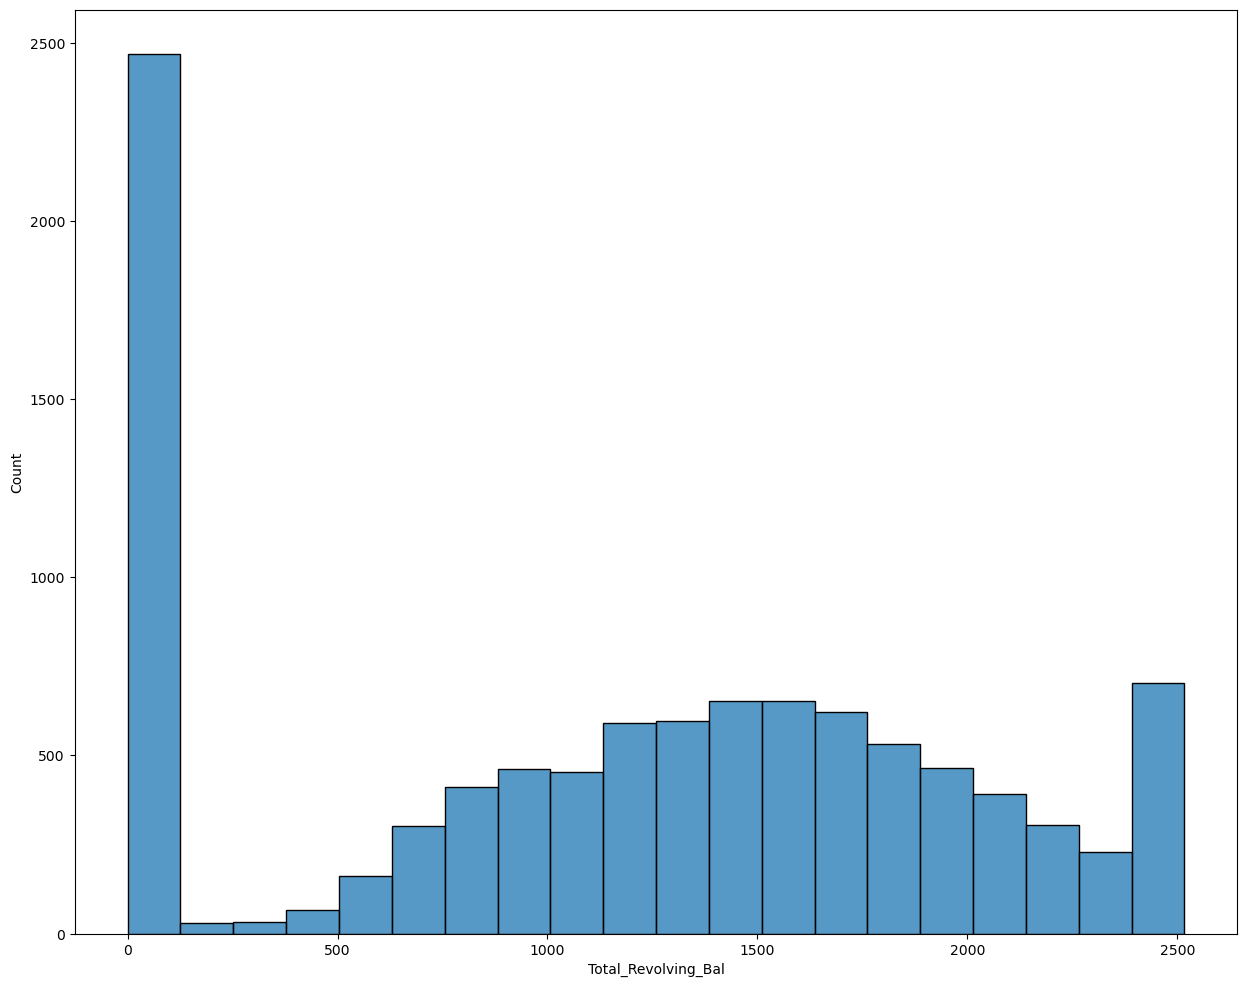

In [19]:
fig, ax = plt.subplots(1, figsize = (15, 12))

sns.histplot(x = df["Total_Revolving_Bal"])


plt.show()

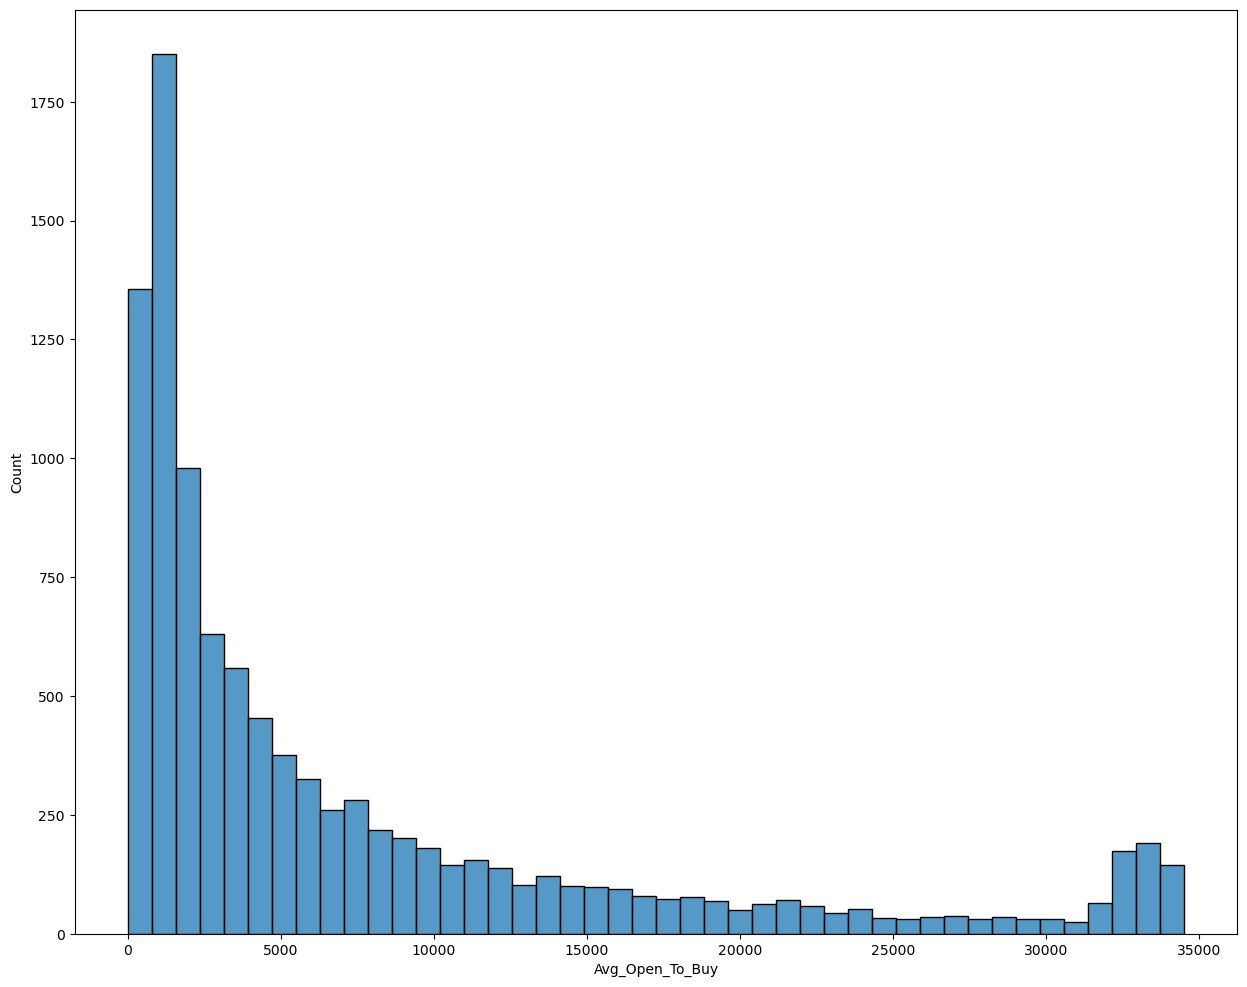

In [20]:
fig, ax = plt.subplots(1,figsize = (15, 12))

sns.histplot(x = df["Avg_Open_To_Buy"])

plt.show()

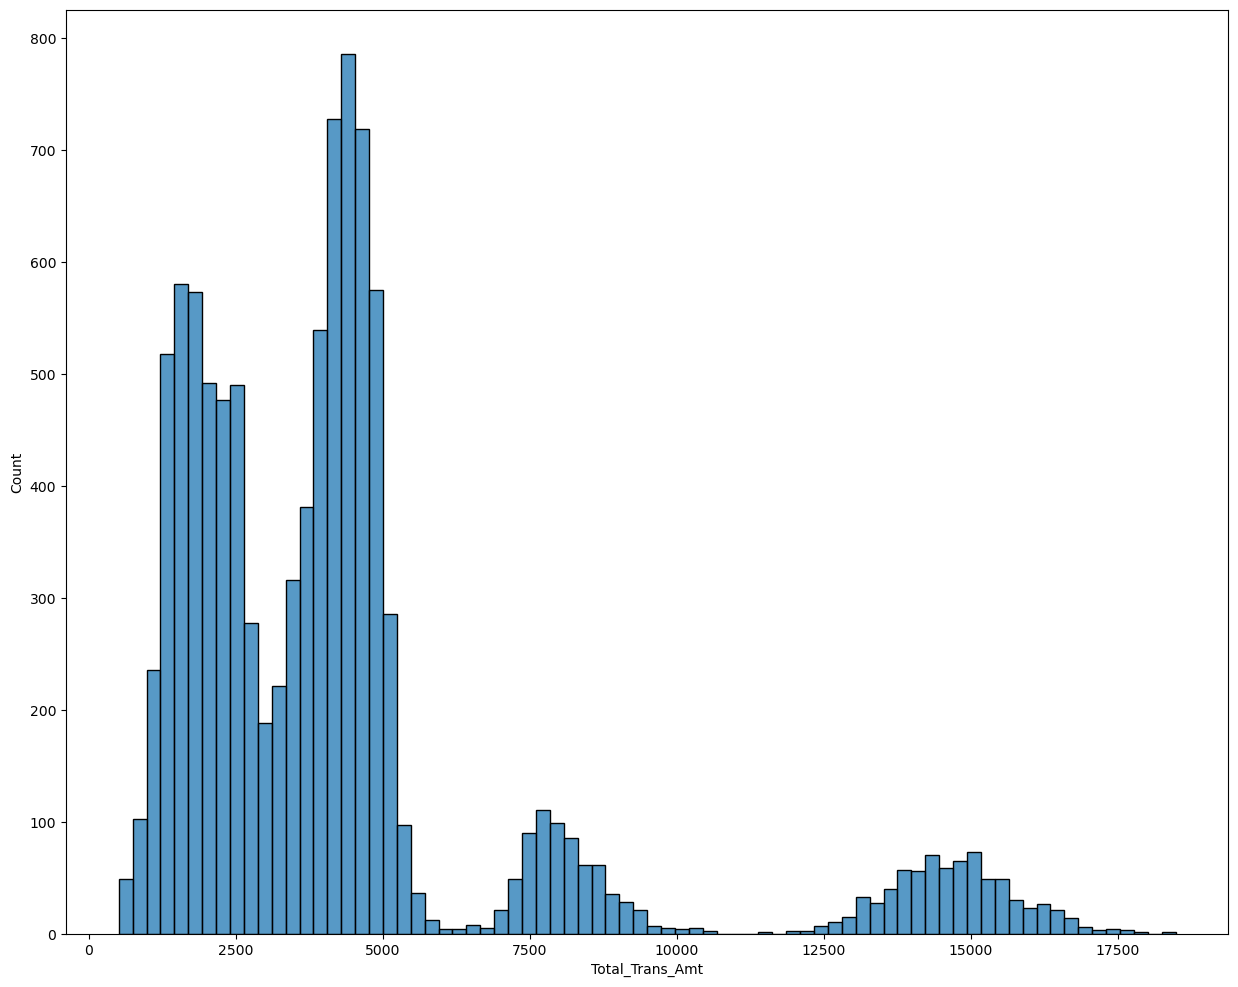

In [21]:
fig, ax = plt.subplots(1, figsize = (15, 12))

sns.histplot(x = df["Total_Trans_Amt"])


plt.show()

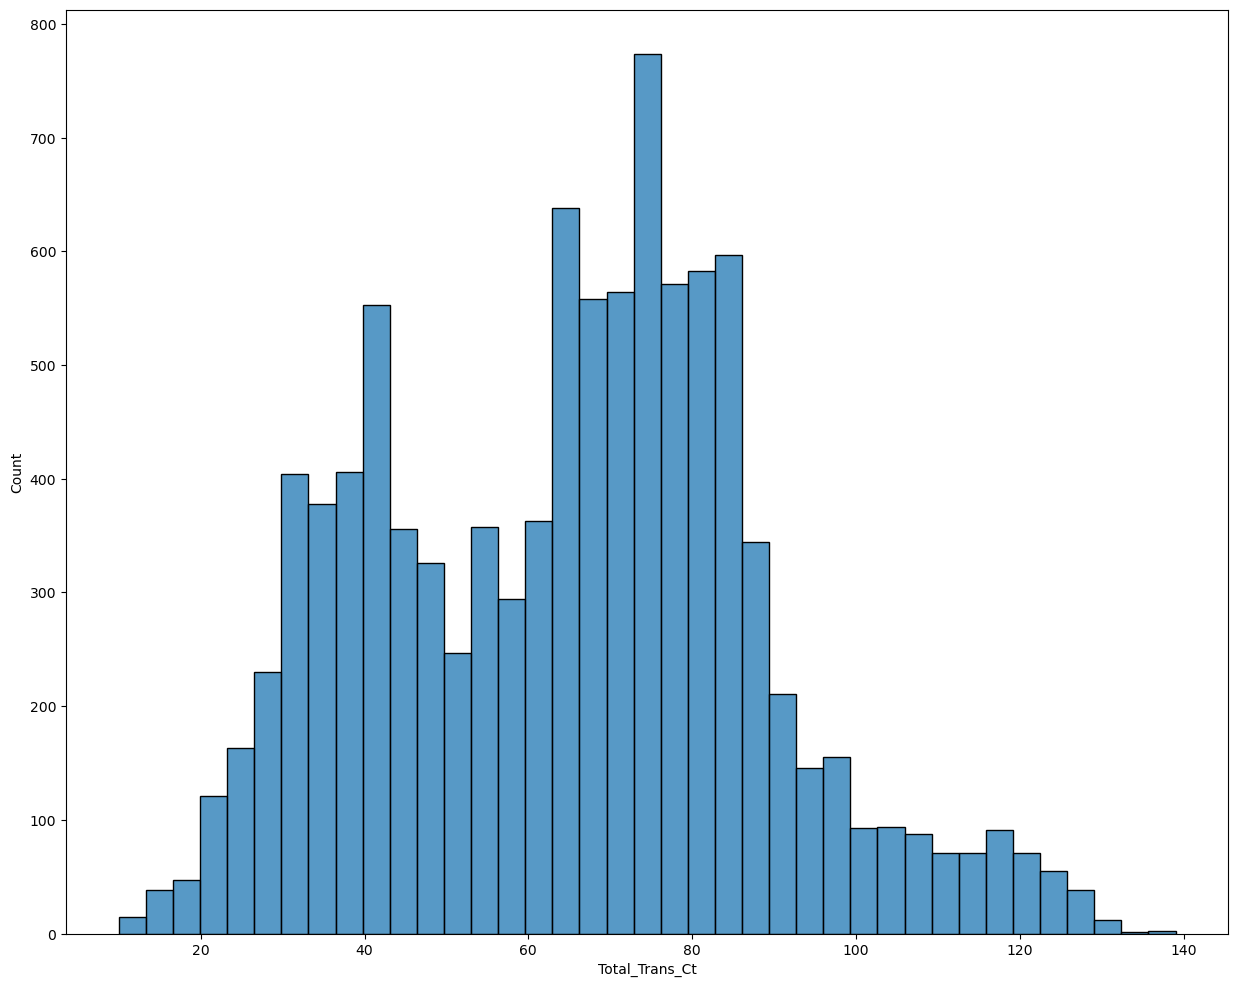

In [22]:
fig, ax = plt.subplots(1, figsize = (15, 12))

sns.histplot(x = df["Total_Trans_Ct"])


plt.show()

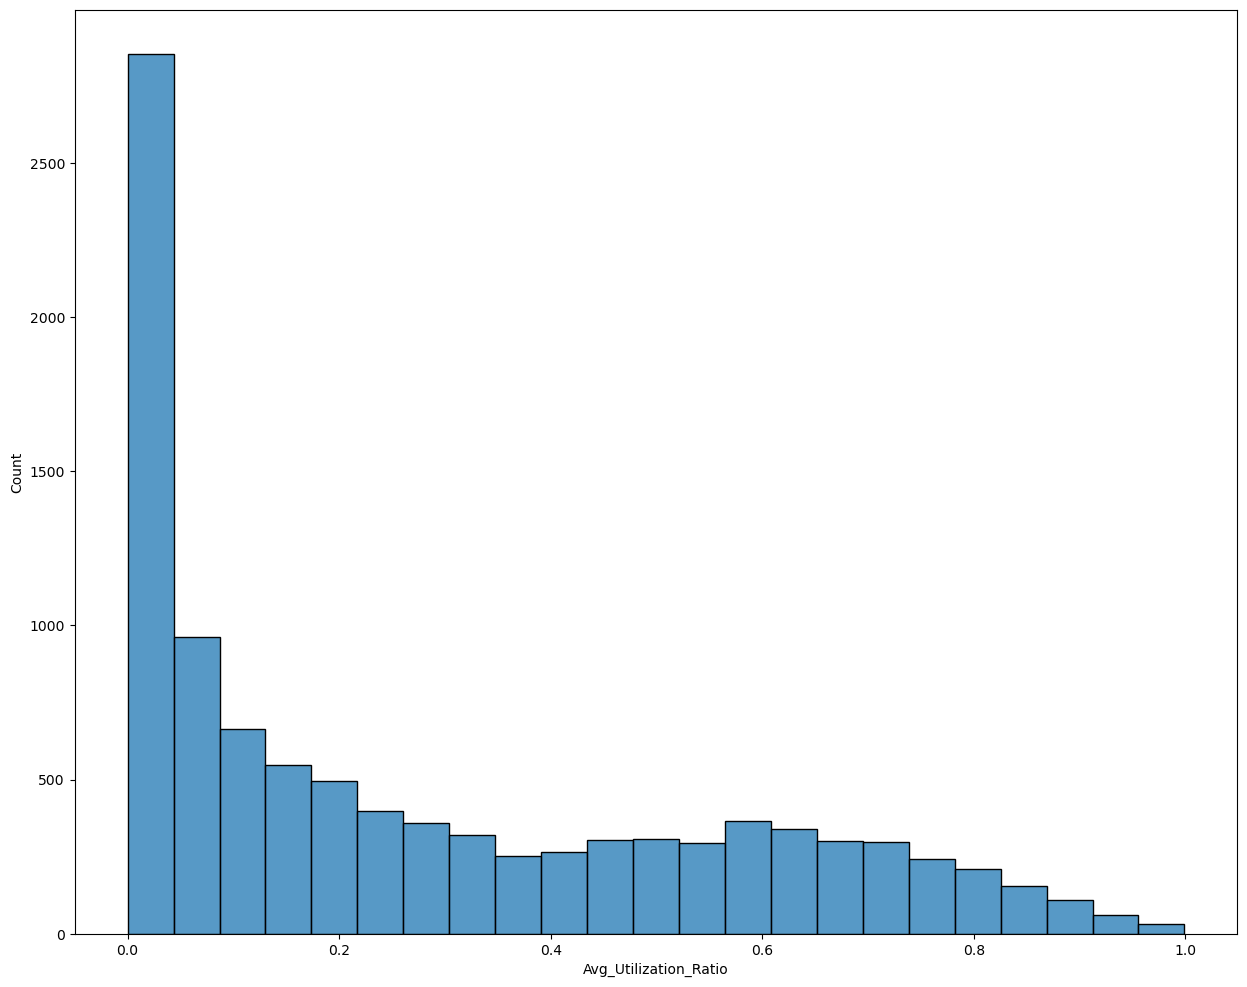

In [23]:
fig, ax = plt.subplots(1,figsize = (15, 12))

sns.histplot(x = df["Avg_Utilization_Ratio"])


plt.show()

# Display the summary statistics of the dataset


# Central tendencies and measures of dispersion and outliers

In [27]:
df1=df.loc[:,['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']]
df1

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [28]:
#Declaring three lists to store calculated mean, median, and mode of 3 companies
import statistics as st
Mean=[]
Median=[]
Mode=[]

#Iterating each column of dataframe
for col in df1.head():
    Mean.append(df1.loc[:,col].mean()) #calculating each column mean and stored within Mean named list
    Median.append(df1.loc[:,col].median()) #calculating each column median and stored within Median named list
    Mode.append(st.mode(df1[col])) #calculating each column mode and stored within Mode named list
    
row_head=['Mean','Median','Mode']
col_names=['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']

#Creating a new dataframe with all calculated mean, median, and mode of 3 companies
d_data=pd.DataFrame([Mean, Median, Mode],columns=col_names)

#Inserting a new column 'Measures' at the begining of the dataframe with 3 measures names
d_data.insert(0, "Measures", row_head, True)

d_data

,Measures,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Mean,7.391776e+08,46.382245,2.7874,35.928409,3.81258,2.341167,2.455317,8703.18055,1162.814061,7469.139637,4404.086304,64.858695,0.274894
1,Median,7.179264e+08,46.000000,2.0000,36.000000,4.00000,2.000000,2.000000,4597.00000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
2,Mode,7.688054e+08,44.000000,3.0000,36.000000,3.00000,3.000000,3.000000,34516.00000,0.000000,1438.300000,4253.000000,81.000000,0.000000


In [29]:
#Declaring three lists to store calculated mean, standard deviation, and coefficient of variation of 3 companies
Mean=[]
SD=[]
CV=[]

#Iterating each column of dataframe
for col in df1.head():
    col_mean=df1.loc[:,col].mean() #calculating each column mean 
    Mean.append(col_mean) #storing within Mean named list
    col_sd=df1.loc[:,col].std() #calculating each column standard deviation 
    SD.append(col_sd) #storing within SD named list
    CV.append(col_sd/col_mean*100)  #calculating each column coefficient of variation and stored within CV named list
    
row_head=['Mean','Standard Deviation','Coefficient of Variation']
col_names=['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']

#Creating a new dataframe with all calculated mean, standard deviation and coefficient of variation of 3 companies
d_data=pd.DataFrame([Mean, SD, CV],columns=col_names)

#Inserting a new column 'Measures' at begining of the dataframe with 3 measures names
d_data.insert(0, "Measures", row_head, True)
d_data

,Measures,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Mean,7.391776e+08,46.382245,2.787400,35.928409,3.812580,2.341167,2.455317,8703.180550,1162.814061,7469.139637,4404.086304,64.858695,0.274894
1,Standard Deviation,3.690378e+07,8.341393,6.479135,7.986416,1.554408,1.010622,1.106225,9162.791334,814.987335,9090.685324,3397.129254,23.472570,0.275691
2,Coefficient of Variation,4.992546e+00,17.984022,232.443671,22.228695,40.770496,43.167460,45.054261,105.280952,70.087503,121.709939,77.135847,36.190322,100.290264


In [30]:
#Iterating each column of dataframe
for bankdetails in df1.head():
    LO=[]#Lower Outliers list
    UO=[]#Upper Outliers list
    bankdetails_series=pd.Series(df1[bankdetails]) #Converting each column values into pandas series
    
    Min=min(bankdetails_series) #Calculating minimum value
    Max=max(bankdetails_series) #Calculating maximum value
    Range=Max-Min #Calculating range
    
    Q1=bankdetails_series.quantile(0.25) #Calculating quartile 1
    Q3=bankdetails_series.quantile(0.75) #Calculating quartile 3
    IQR=Q3-Q1 #Calculating inter quartile range
    UF=Q3+1.5*IQR #Calculating upper fence
    LF=Q1-1.5*IQR #Calculating lower fence
    
    # The rule of 1.5 * IQR 
    # (IQR*1.5) = k 
    # Any point beyond Q3+k is an outlier 
    # Any point beyond Q1-k is an outlier 
    for i in df1[bankdetails]:
        if(i<LF):
            LO.append(i)
        if(i>UF):
            UO.append(i)
    
    #Storing all above the calculated minimum, maximum, range, Q1, Q3, IQR, 
    #upper fence, lower fence, and outliers into respective lists
    if(bankdetails=="CLIENTNUM"):
        CLIENTNUM=['CLIENTNUM',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Customer_Age"):
        Customer_Age=['Customer_Age',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Dependent_count"):
        Dependent_count=['Dependent_count',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Months_on_book"):
        Months_on_book=['Months_on_book',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Total_Relationship_Count"):
        Total_Relationship_Count=['Total_Relationship_count',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Months_Inactive_12_mon"):
        Months_Inactive_12_mon=['Months_Inactive_12_mon',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Contacts_Count_12_mon"):
        Contacts_Count_12_mon=['Contacts_Count_12_mon',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Credit_Limit"):
        Credit_Limit=['Credit_Limit',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Total_Revolving_Bal"):
        Total_Revolving_Bal=['Total_Revolving_Bal',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Avg_Open_To_Buy"):
        Avg_Open_To_Buy=['Avg_Open_To_Buy',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Total_Trans_Amt"):
        Total_Trans_Amt=['Total_Trans_Amt',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(bankdetails=="Total_Trans_Ct"):
        Total_Trans_Ct=['Total_Trans_Ct',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    else:
        Avg_Utilization_Ratio=['Avg_Utilization_Ratio',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]] 
        
col_names=['bankdetails','Min','Max','Range','Q1','Q3','IQR','Lower Fence', 'Upper Fence','Outliers']
#Creating a new dataframe with all calculated values of 3 companies
d_data=pd.DataFrame([CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio],columns=col_names) 
d_data

,bankdetails,Min,Max,Range,Q1,Q3,IQR,Lower Fence,Upper Fence,Outliers
0,CLIENTNUM,708082083.0,8.283431e+08,1.202610e+08,7.130368e+08,7.731435e+08,60106762.50,6.228766e+08,8.633037e+08,"[[], []]"
1,Customer_Age,18.0,8.900000e+01,7.100000e+01,4.100000e+01,5.200000e+01,11.00,2.450000e+01,6.850000e+01,"[[23, 23, 22, 23, 20, 19, 19, 23, 19, 20, 20, ..."
2,Dependent_count,0.0,1.430000e+02,1.430000e+02,1.000000e+00,3.000000e+00,2.00,-2.000000e+00,6.000000e+00,"[[], [9, 29, 103, 22, 25, 78, 90, 35, 60, 42, ..."
3,Months_on_book,13.0,5.600000e+01,4.300000e+01,3.100000e+01,4.000000e+01,9.00,1.750000e+01,5.350000e+01,"[[13, 13, 13, 15, 17, 13, 13, 13, 17, 17, 13, ..."
4,Total_Relationship_count,1.0,6.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,2.00,0.000000e+00,8.000000e+00,"[[], []]"
5,Months_Inactive_12_mon,0.0,6.000000e+00,6.000000e+00,2.000000e+00,3.000000e+00,1.00,5.000000e-01,4.500000e+00,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6,Contacts_Count_12_mon,0.0,6.000000e+00,6.000000e+00,2.000000e+00,3.000000e+00,1.00,5.000000e-01,4.500000e+00,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,Credit_Limit,1438.3,3.466400e+04,3.322570e+04,2.563000e+03,1.108150e+04,8518.50,-1.021475e+04,2.385925e+04,"[[], [34516.0, 29081.0, 30367.0, 32426.0, 3451..."
8,Total_Revolving_Bal,0.0,2.517000e+03,2.517000e+03,3.590000e+02,1.784000e+03,1425.00,-1.778500e+03,3.921500e+03,"[[], []]"
9,Avg_Open_To_Buy,3.0,3.451600e+04,3.451300e+04,1.324500e+03,9.859000e+03,8534.50,-1.147725e+04,2.266075e+04,"[[], [32252.0, 27685.0, 28005.0, 31848.0, 3451..."


# Identify the outliers in the dataset


In [34]:
outliers=d_data.loc[:,['bankdetails','Outliers']]
outliers

,bankdetails,Outliers
0,CLIENTNUM,"[[], []]"
1,Customer_Age,"[[23, 23, 22, 23, 20, 19, 19, 23, 19, 20, 20, ..."
2,Dependent_count,"[[], [9, 29, 103, 22, 25, 78, 90, 35, 60, 42, ..."
3,Months_on_book,"[[13, 13, 13, 15, 17, 13, 13, 13, 17, 17, 13, ..."
4,Total_Relationship_count,"[[], []]"
5,Months_Inactive_12_mon,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6,Contacts_Count_12_mon,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,Credit_Limit,"[[], [34516.0, 29081.0, 30367.0, 32426.0, 3451..."
8,Total_Revolving_Bal,"[[], []]"
9,Avg_Open_To_Buy,"[[], [32252.0, 27685.0, 28005.0, 31848.0, 3451..."


In [32]:
d_data.to_csv('outliers.csv')

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:

def boxplot(column):
    sns.boxplot(data=df,x=df[f"{column}"])
    plt.title(f"Boxplot of bank churn data {column}")
    plt.show()

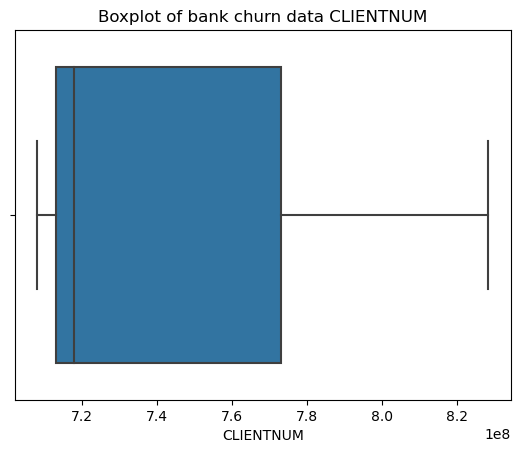

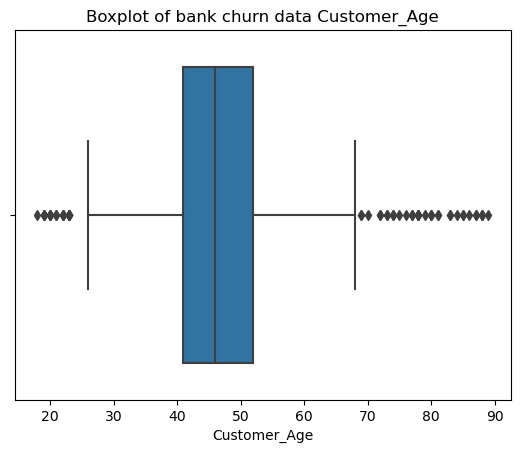

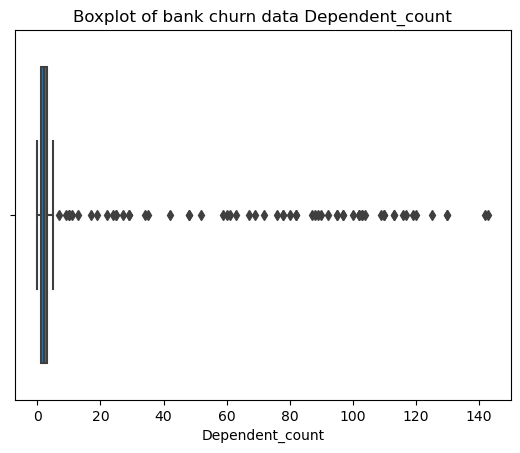

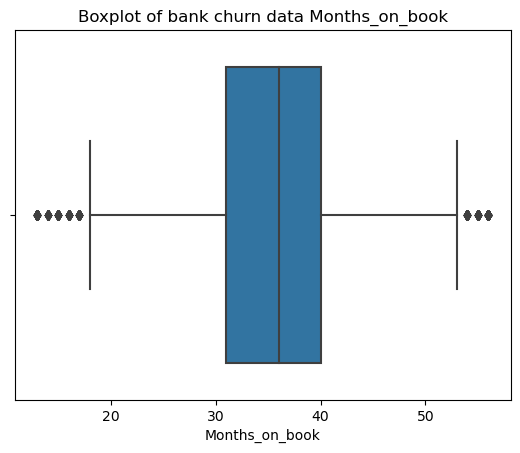

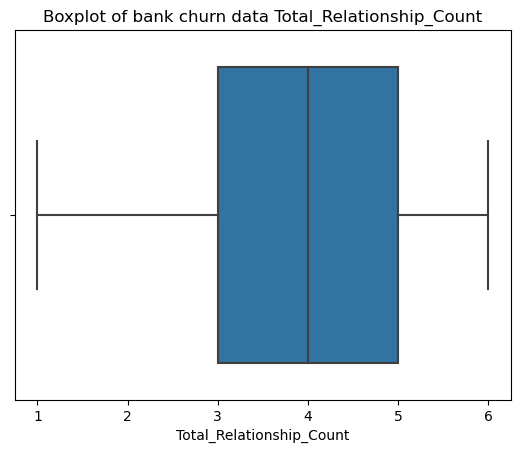

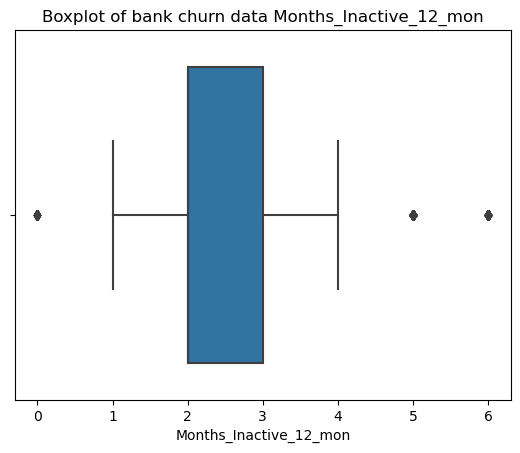

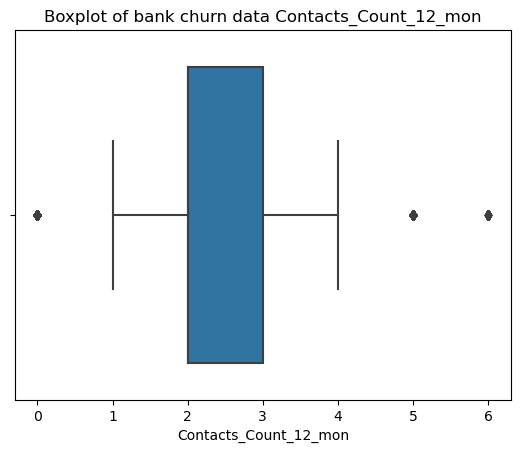

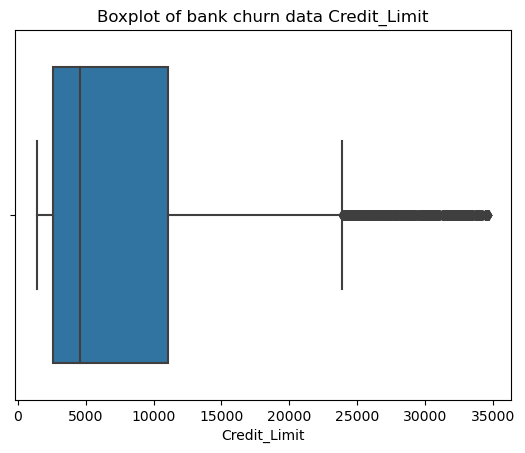

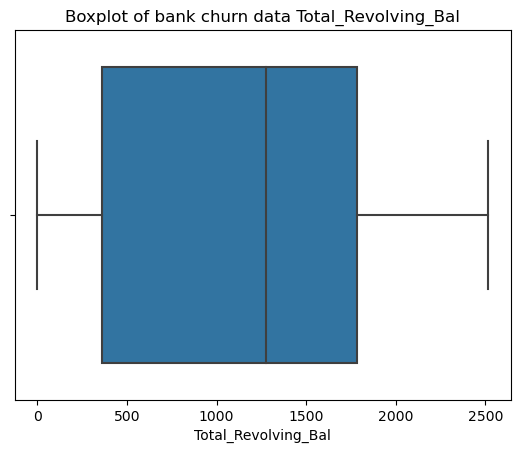

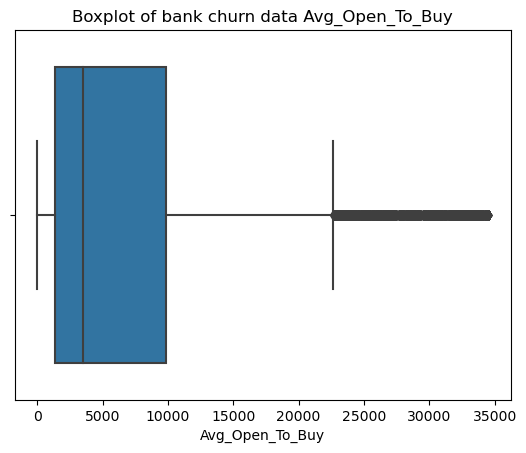

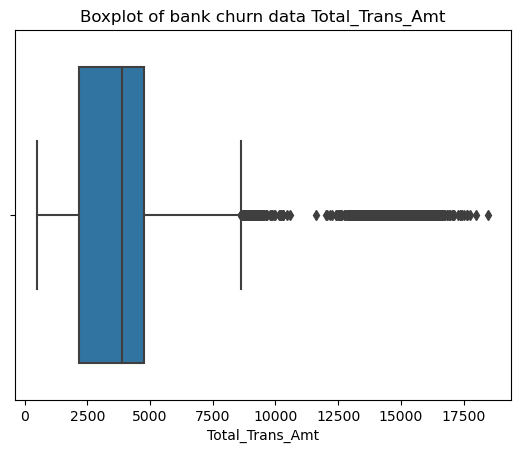

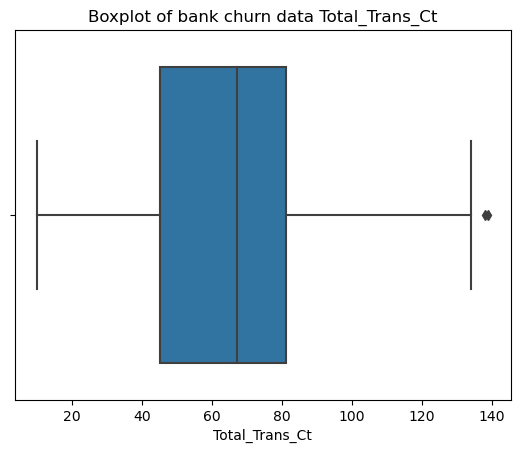

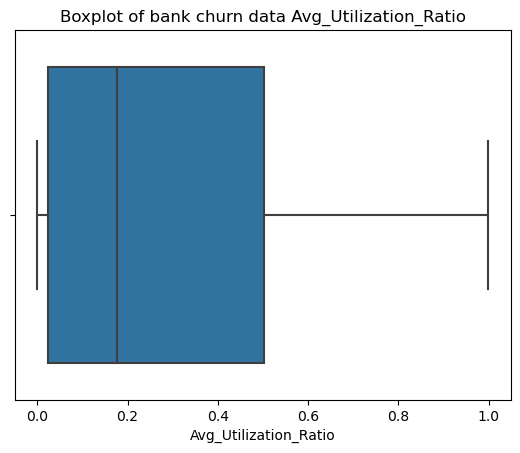

In [25]:
boxplot('CLIENTNUM')
boxplot('Customer_Age')
boxplot('Dependent_count')
boxplot('Months_on_book')
boxplot('Total_Relationship_Count')
boxplot('Months_Inactive_12_mon')
boxplot('Contacts_Count_12_mon')
boxplot('Credit_Limit')
boxplot('Total_Revolving_Bal')
boxplot('Avg_Open_To_Buy')
boxplot('Total_Trans_Amt')
boxplot('Total_Trans_Ct')
boxplot('Avg_Utilization_Ratio')